In [41]:
import sys
print(sys.path)

['c:\\Users\\User\\Documents\\news_sentiment_analysis', 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python311', '', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin', 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages']


In [22]:
from newsapi import NewsApiClient
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, FreqDist

import string

import ipywidgets as widgets
from IPython.display import display

In [23]:
from config import API_KEY

In [24]:
newsapi = NewsApiClient(api_key=API_KEY)

In [25]:
def get_user_input():
    user_input = input('Por favor, ingrese un tema:')
    return user_input

In [26]:
user_topic = get_user_input()

In [27]:
all_articles = newsapi.get_everything(q=user_topic, language = 'en', sort_by='relevancy')

In [28]:
all_articles

{'status': 'ok',
 'totalResults': 5047,
 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': 'https://www.facebook.com/bbcnews',
   'title': 'Growing backlash over Harvard students pro-Palestine letter',
   'description': 'Lawmakers and alumni have been angered by the letter, which blames Israel for the unfolding conflict.',
   'url': 'https://www.bbc.co.uk/news/world-us-canada-67067565',
   'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/5288/production/_131382112_gettyimages-1268846574.jpg',
   'publishedAt': '2023-10-10T13:22:18Z',
   'content': 'A letter from Harvard University student groups blaming Israel for violence in the region has drawn a backlash from prominent alumni and US lawmakers. \r\nThe letter, authored by the Harvard Undergradu… [+2571 chars]'},
  {'source': {'id': 'business-insider', 'name': 'Business Insider'},
   'author': 'Sebastian Cahill',
   'title': "A Tiktoker 'girlsplained' the Israel-Hamas war. She later removed the

data preprocessing

In [29]:
df = pd.DataFrame(all_articles['articles'])

In [30]:
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Growing backlash over Harvard students pro-Pal...,Lawmakers and alumni have been angered by the ...,https://www.bbc.co.uk/news/world-us-canada-670...,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-10T13:22:18Z,A letter from Harvard University student group...
1,"{'id': 'business-insider', 'name': 'Business I...",Sebastian Cahill,A Tiktoker 'girlsplained' the Israel-Hamas war...,TikTok user @nikitadumptruck apologized for a ...,https://www.businessinsider.com/nikitadumptruc...,https://i.insider.com/65305e97211def8ed838c76b...,2023-10-19T00:18:46Z,Photo of destroyed buildings in the Gaza Strip...
2,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Israel and Gaza on campus: Tumult at US colleg...,Duelling protests at Columbia University show ...,https://www.bbc.co.uk/news/world-us-canada-671...,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-16T15:07:21Z,A debate over the war between Israel and Hamas...
3,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Bowen: Israel blindsided by most serious attac...,Risk of flare-up between Palestinian militants...,https://www.bbc.co.uk/news/world-middle-east-6...,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-07T16:33:39Z,Israel was taken by surprise by the most ambit...
4,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,The lives upended by colonial rule in the Midd...,British and French control of the region a cen...,https://www.bbc.co.uk/news/world-middle-east-6...,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-03T00:17:52Z,Eid Haddad's parents were teenagers when they ...


In [31]:
df.shape

(100, 8)

In [32]:
# Text processing function for 'content'
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML code
    pattern = r'<[^>]+>'
    text = re.sub(pattern, '', text)
    # Remove URLs
    pattern = r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'
    text = re.sub(pattern, '', text)
    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove the word "chars"
    text = text.replace('chars', '')
    # Remove "via Getty Images" text
    text = re.sub(r'\b(via|getty|images)\b', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    filtered_words = [token for token in tokens if fdist[token] < fdist.N() * 0.1]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in filtered_words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [33]:
df['content'] = df['content'].apply(preprocess_text)

In [34]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0.5:
        return 'positive'
    elif compound_score <= -0.5:
        return 'negative'
    else:
        return 'neutral'

In [35]:
df['content_sentiment'] = df['content'].apply(get_sentiment)

In [36]:
df.tail()

,source,author,title,description,url,urlToImage,publishedAt,content,content_sentiment
95,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Al Jazeera,Five films that tell the human stories behind ...,From children who have lost their families to ...,https://www.aljazeera.com/features/2023/10/16/...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-16T12:23:30Z,1 gaza surviving shujayea 13th day israel assa...,neutral
96,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Marwan Bishara,Rethinking Palestine-Israel: Hegemonic securit...,Israeli security has come at the expense of Pa...,https://www.aljazeera.com/opinions/2023/10/18/...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-18T13:18:33Z,israeli bombing baptist hospital gaza killing ...,negative
97,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Al Jazeera,What has the UN done on the Israel-Palestine c...,The UN's chief is at a centre of diplomatic te...,https://www.aljazeera.com/news/2023/10/25/what...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-25T15:19:10Z,israel united nation locked bitter spat un sec...,neutral
98,"{'id': None, 'name': 'London Review of Books'}",Eyal Weizman,Exchange Rate,"However the conflict ends, with or without Ham...",https://www.lrb.co.uk/the-paper/v45/n21/eyal-w...,https://www.lrb.co.uk/storage/social_image_on_...,2023-10-25T14:13:50Z,in​ spring 1956 eight year nakba group palesti...,neutral
99,"{'id': None, 'name': 'Thedailyupside.com'}",newsfeedback@fool.com (Brian Boyle from The Da...,"Oil Leaps, Shekel Falls After Israel Declares War",The economic aftershocks of open conflict betw...,https://www.thedailyupside.com/economics/inter...,https://www.thedailyupside.com/wp-content/uplo...,2023-10-09T23:00:06Z,economic aftershock open conflict israel pales...,negative


In [37]:
positive_df = df[df['content_sentiment'] == 'positive']
negative_df = df[df['content_sentiment'] == 'negative']
neutral_df = df[df['content_sentiment'] == 'neutral']

In [38]:
def create_wordcloud(dataframe, title, subplot):
    all_text = ' '.join(dataframe['content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    subplot.imshow(wordcloud, interpolation='bilinear')
    subplot.axis('off')
    subplot.set_title(title)

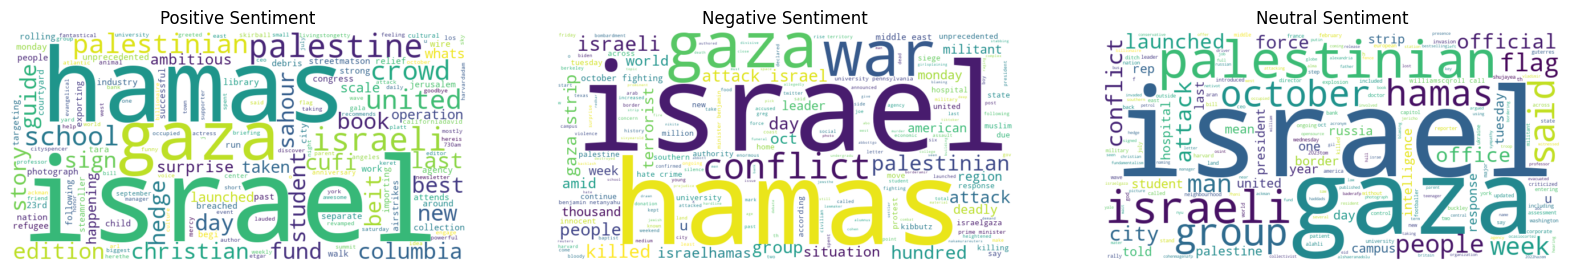

In [39]:
# Create a subplot with three WordClouds in a horizontal layout
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
plt.subplots_adjust(wspace=0.2)  # Adjust the space between subplots

# Create WordClouds for each sentiment and display them in the subplots
create_wordcloud(positive_df, 'Positive Sentiment', axs[0])
create_wordcloud(negative_df, 'Negative Sentiment', axs[1])
create_wordcloud(neutral_df, 'Neutral Sentiment', axs[2])

# Show the subplots
plt.show()

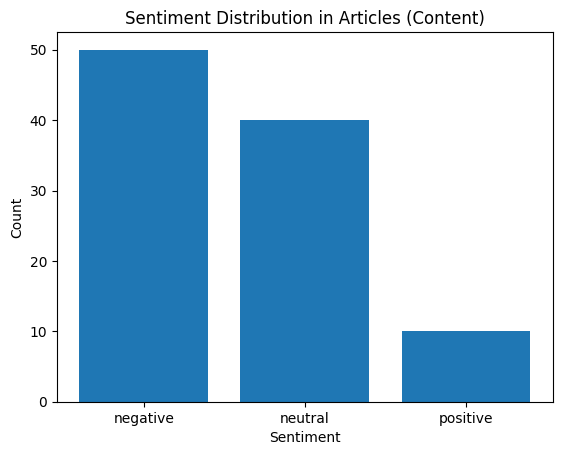

In [40]:
# Create a bar chart to show the sentiment distribution
sentiment_counts = df['content_sentiment'].value_counts()
sentiments = sentiment_counts.index
count = sentiment_counts.values

plt.bar(sentiments, count)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Articles (Content)')
plt.show()